In [ ]:
#Decision Tree Classifier Algorithm

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#reading the Dataframe

In [2]:
df=pd.read_csv("Task_3_bank.csv",sep=";")

In [145]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [146]:
df.duplicated().sum()

0

In [147]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [27]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
#Data visualization

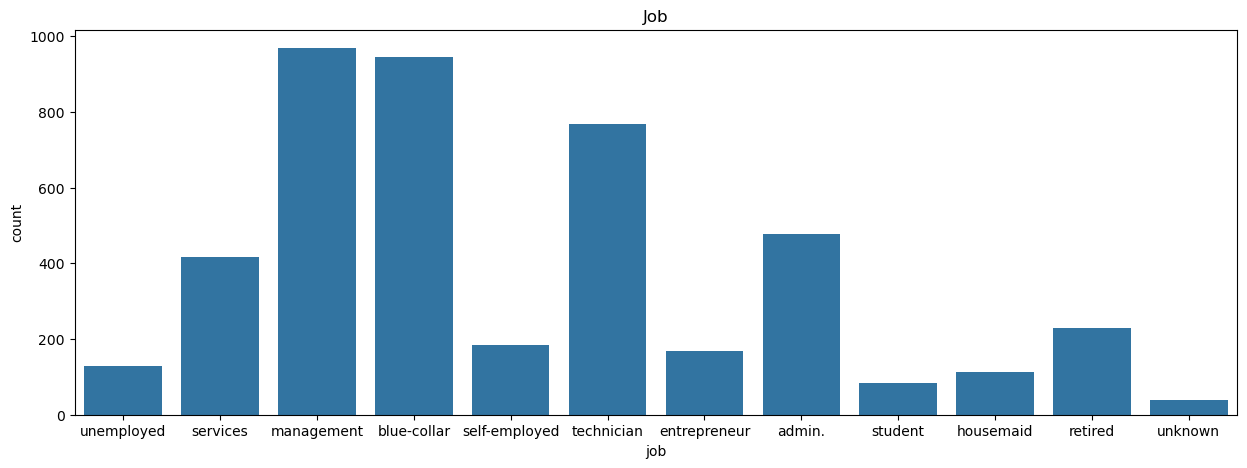

In [24]:
plt.figure(figsize=(15,5))
sb.countplot(x=df["job"])
plt.title("Job")
plt.show()

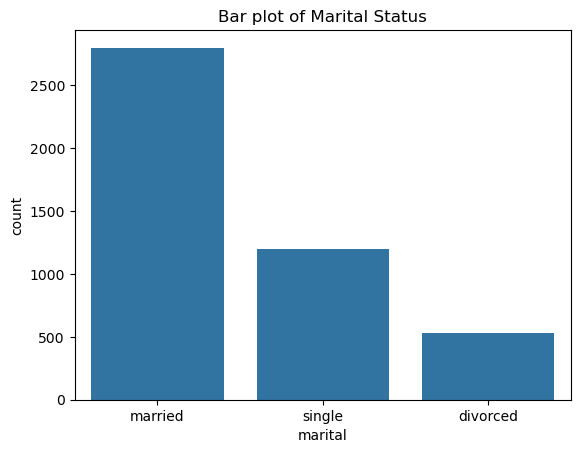

In [38]:
sb.countplot(x=df["marital"])
plt.title("Bar plot of Marital Status")
plt.show()

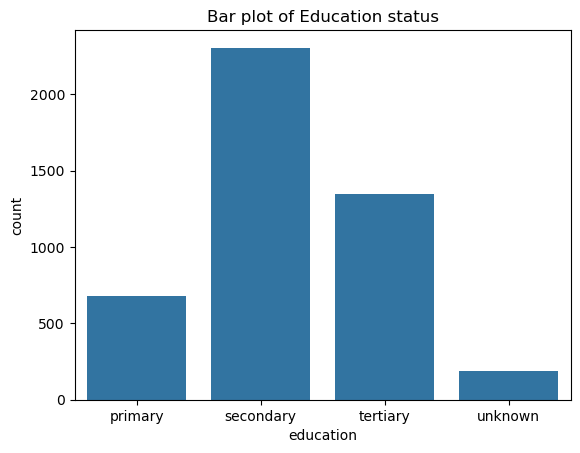

In [39]:
sb.countplot(x=df["education"])
plt.title("Bar plot of Education status")
plt.show()

In [ ]:
#number of deposits

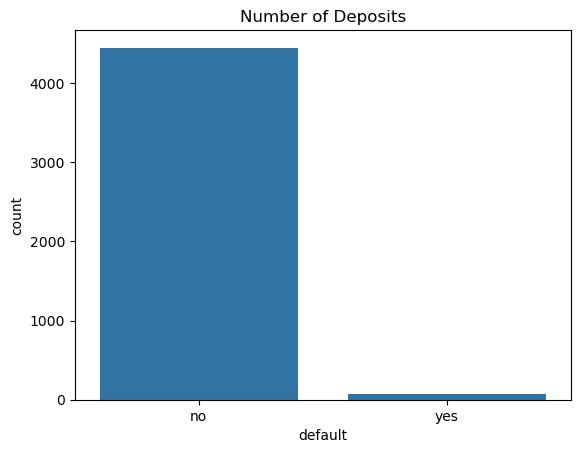

In [3]:
sb.countplot(x=df["default"])
plt.title("Number of Deposits")
plt.show()

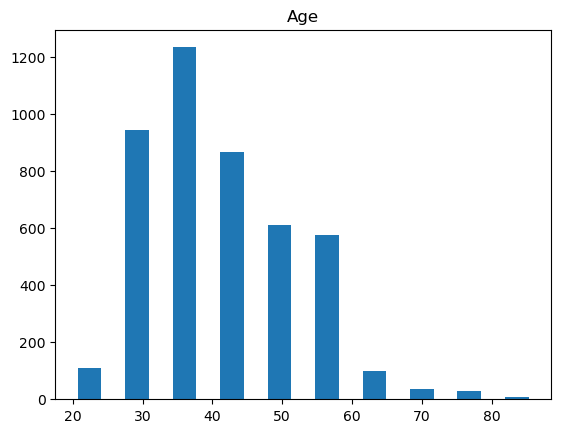

In [43]:
plt.hist(x=df["age"],rwidth=0.5)
plt.title("Age")
plt.show()

In [ ]:
#Finding the correlation

In [29]:
corr=encoded_X.corr()

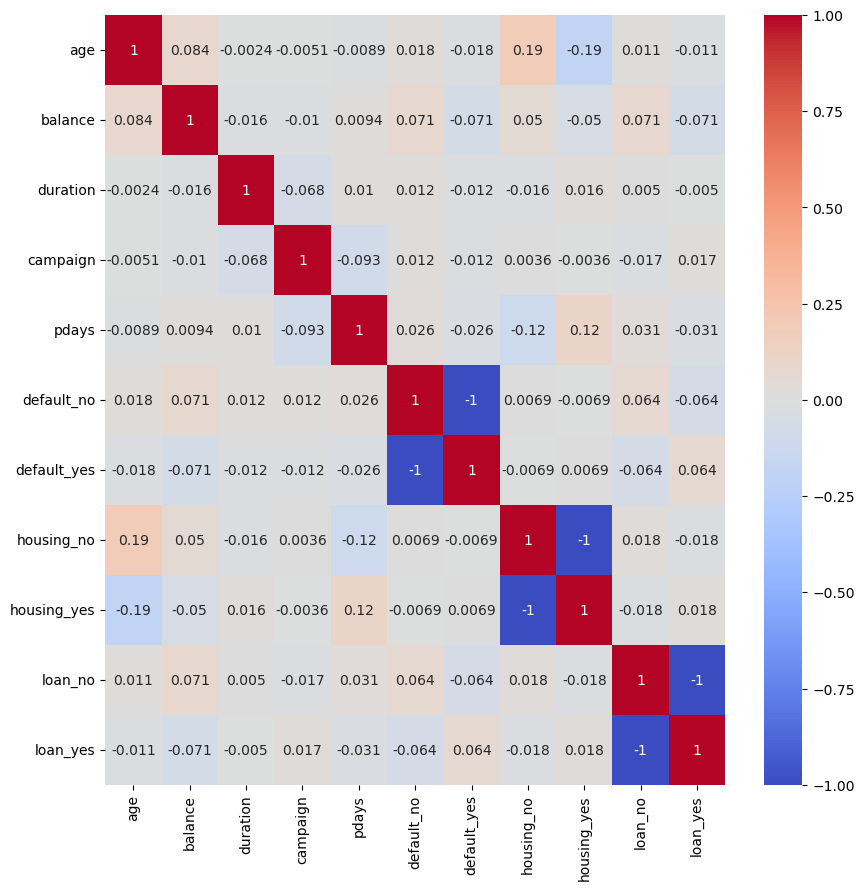

In [31]:
plt.figure(figsize=(10,10))
sb.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
#Number of housing loan

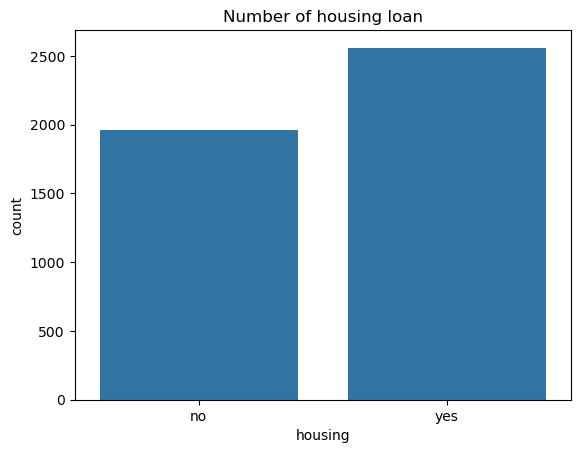

In [33]:
sb.countplot(x=df["housing"])
plt.title("Number of housing loan")
plt.show()

In [ ]:
#number of personal loan

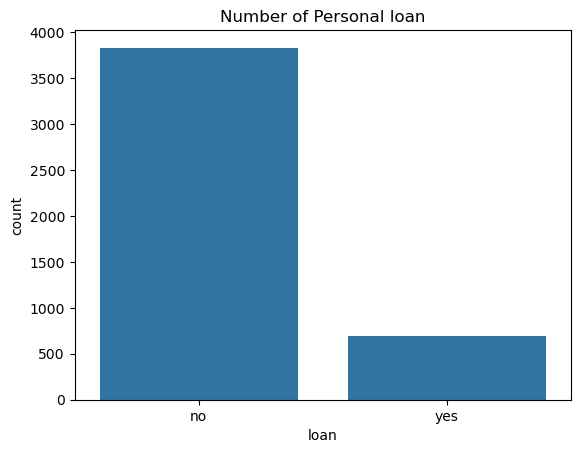

In [34]:
sb.countplot(x=df["loan"])
plt.title("Number of Personal loan")
plt.show()

In [ ]:
#Box plot of balance to find mean and outliers

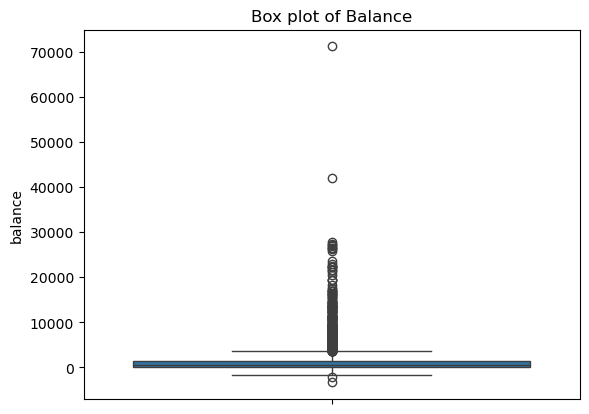

In [37]:
sb.boxplot(df["balance"])
plt.title("Box plot of Balance")
plt.show()

In [ ]:
#separete target and Features

In [6]:
y=df["y"]

In [152]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [ ]:
#dropping the unwanted columns in features dataset

In [7]:
X=df.drop(["day","month","y","education","marital","job","poutcome","previous","contact"],axis=1)

In [ ]:
#Normalize the high range difference numerical values

In [8]:
X['balance'] = (df['balance'] - df['balance'].mean()) / df['balance'].std()
X['duration'] = (df['duration'] - df['duration'].mean()) / df['duration'].std()
X['pdays'] = (df['pdays'] - df['pdays'].mean()) / df['pdays'].std()

In [239]:
X.head()

,age,default,balance,housing,loan,duration,campaign,pdays
0,30,no,0.121058,no,no,-0.711782,1,-0.407173
1,33,no,1.118521,yes,yes,-0.169175,1,2.988713
2,35,no,-0.024142,yes,no,-0.303865,1,2.898822
3,30,no,0.017724,yes,yes,-0.249989,4,-0.407173
4,59,no,-0.472701,yes,no,-0.146086,1,-0.407173


In [ ]:
#coverting the categorical Value into Numerical Values

In [9]:
encoded_X=pd.get_dummies(X)
encoded_y=pd.get_dummies(y)

In [ ]:
#splitting the dataset into train data and test data

In [10]:
X_train,X_test,y_train,y_test=train_test_split(encoded_X,encoded_y,test_size=0.35,random_state=42)

In [ ]:
#creating the model DecisionTreeClassifier Algorithm

In [11]:
model=DecisionTreeClassifier(random_state=42)

In [26]:
#Train the Model with Train Dataset

In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Predicting the values

In [13]:
y_pred=model.predict(X_test)

In [ ]:
#Calulating  the accuray score

In [14]:
print(f"Accuracy Score:{accuracy_score(y_test,y_pred)}")

Accuracy Score:0.8616550852811118


In [15]:
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1418
           1       0.35      0.38      0.37       165

   micro avg       0.86      0.86      0.86      1583
   macro avg       0.64      0.65      0.64      1583
weighted avg       0.87      0.86      0.86      1583
 samples avg       0.86      0.86      0.86      1583



In [ ]:
#plotting the Decision Tree

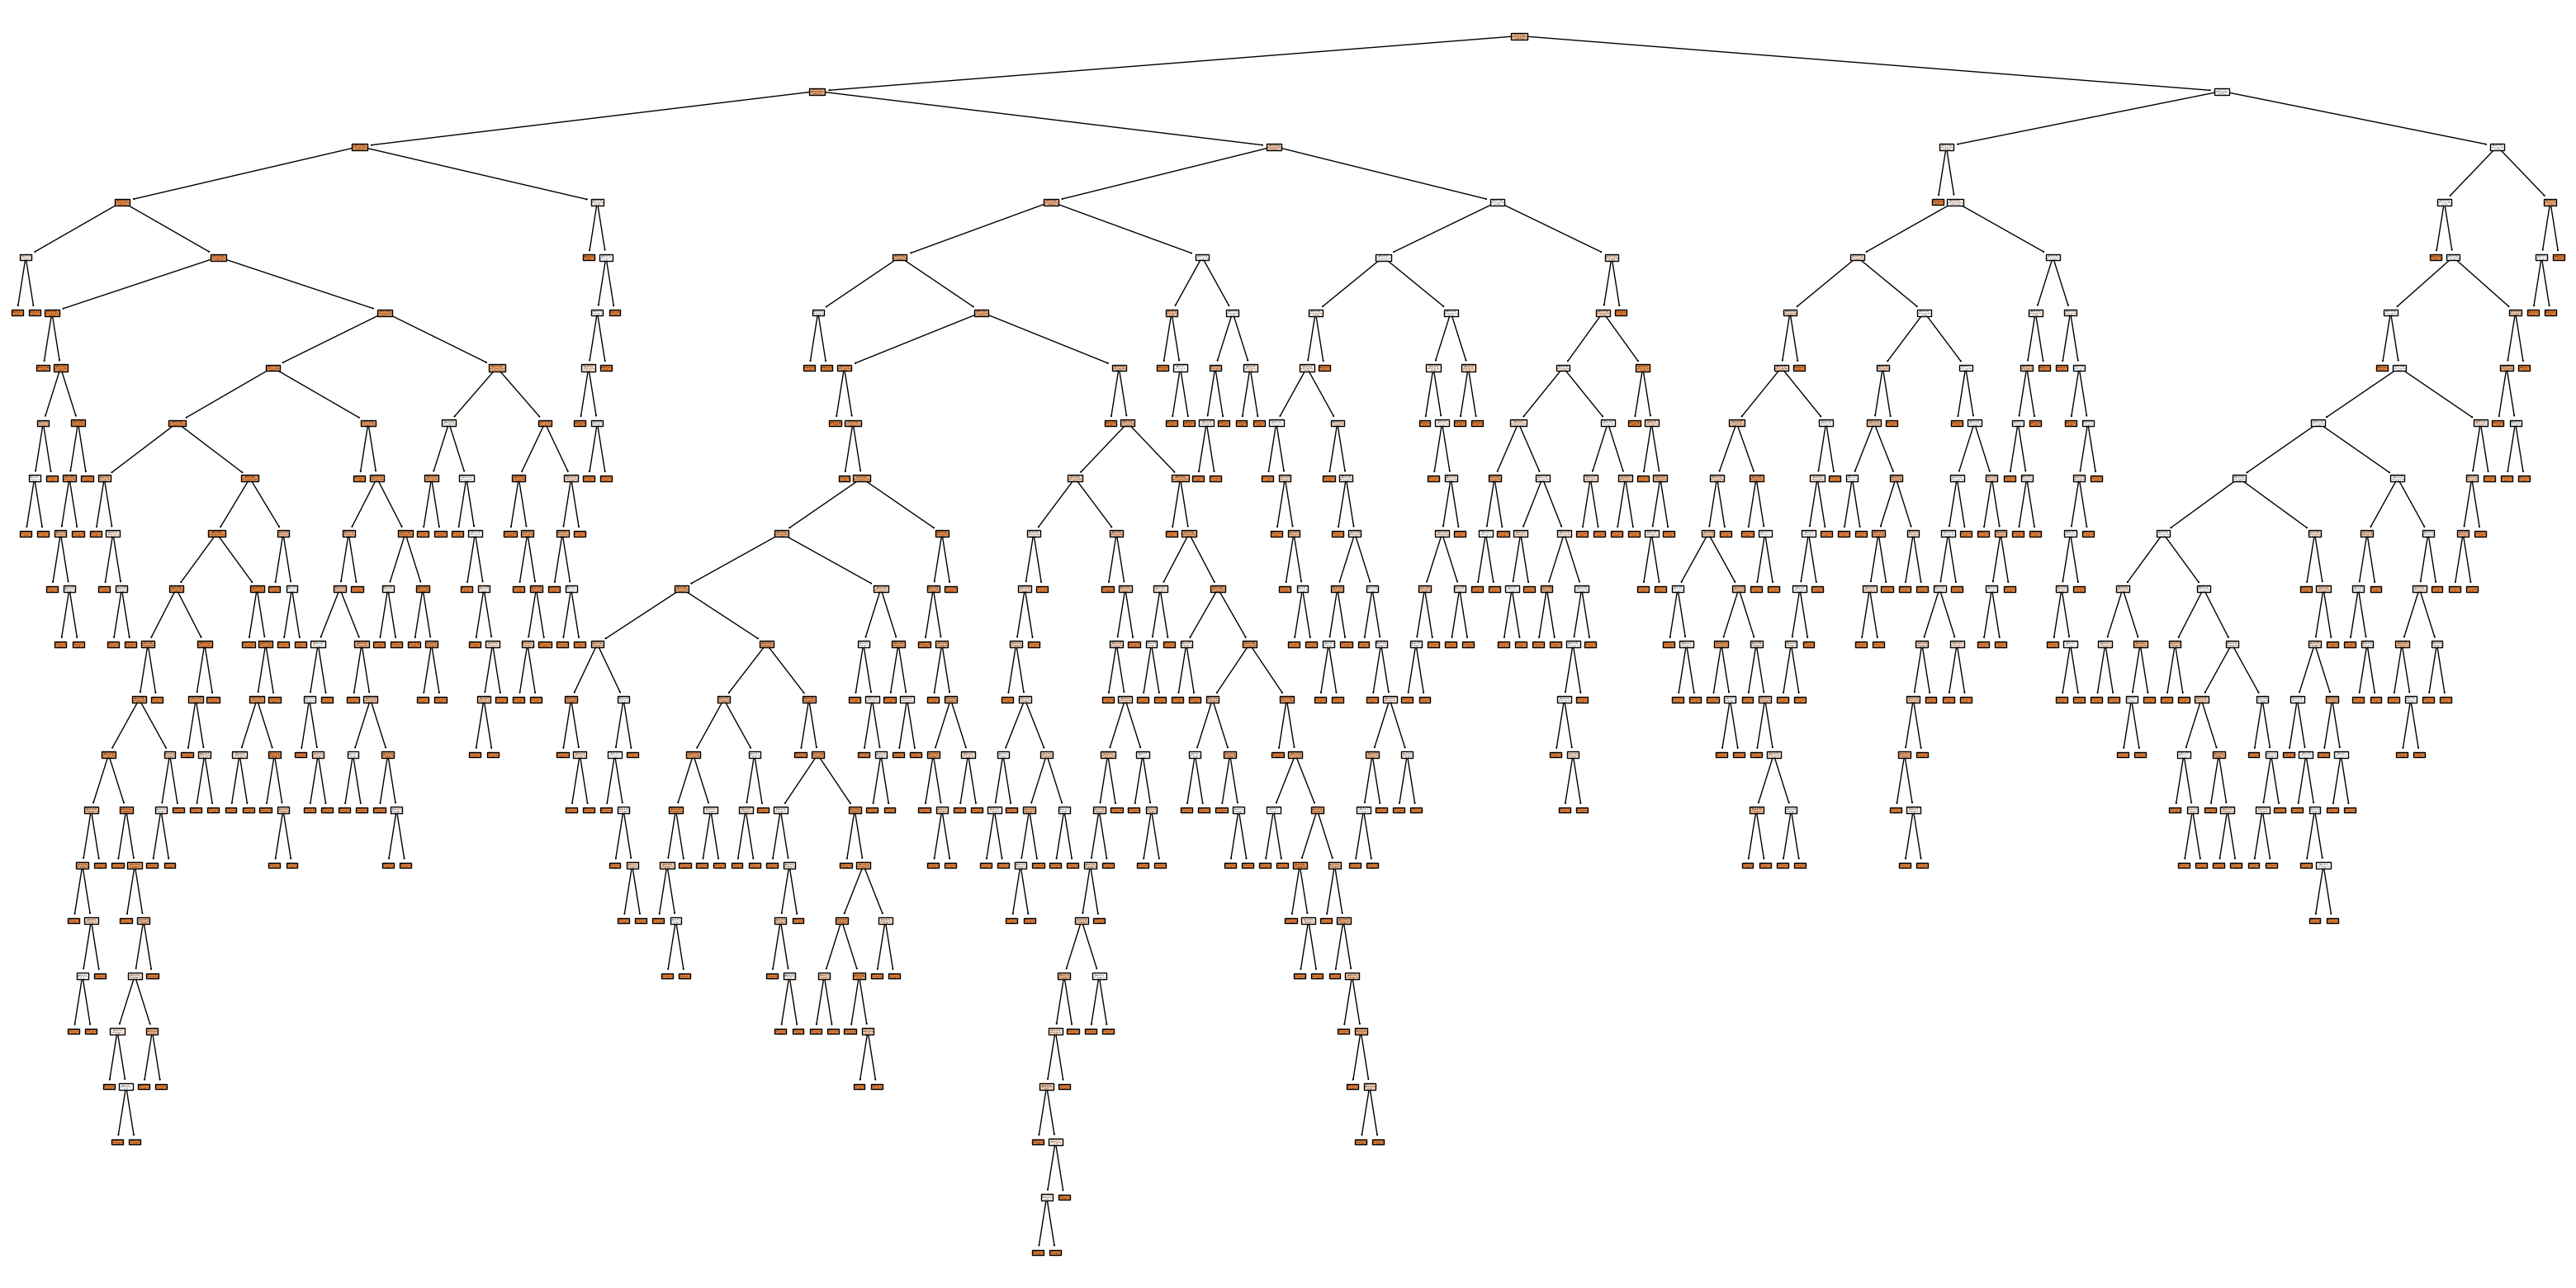

In [26]:
plt.figure(figsize=(40,20))
feature_names=df.columns.tolist()
class_names=[0,1]
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()